In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Allow for full tables to be shown
pd.options.display.max_columns = None
pd.options.display.max_rows = None


In [2]:
data1 = pd.read_csv(r'YOUR FILEPATH\Mappe1.csv',encoding="latin-1")
data2 = pd.read_csv(r'YOUR FILEPATH\Mappe2.csv',encoding="latin-1")
data2 = data2.drop(columns=["Rg","Spieler","Land","Pos","Verein","Alt","Geboren","90"])
data3 = pd.read_csv(r'YOUR FILEPATH\Mappe3.csv',encoding="latin-1")
data3 = data3.drop(columns=["Rg","Spieler","Land","Pos","Verein","Alt","Geboren","90"])
data4 = pd.read_csv(r'YOUR FILEPATH\Mappe4.csv',encoding="latin-1")
data4 = data4.drop(columns=["Rg","Spieler","Land","Pos","Verein","Alt","Geboren","90"])
data = pd.concat([data1,data2,data3,data4],axis=1)
data

,Rg,Spieler,Land,Pos,Verein,Alt,Geboren,90,Vol,Ver,Vol%,GesEntf,ProgEntf,Vol.1,Ver.1,Vol%.1,Vol.2,Ver.2,Vol%.2,Vol.3,Ver.3,Vol%.3,Vor,xA,A-xA,WP,1/3,PPA,FlkSr,Fortschr.,Spiele,Ver,Live,Tot,FS,SP,Pressen,W,Fla,EB,Innen,AuÃen,Ger.,Boden,Tief,Hoch,Links,Rechts,Kopf,EW,Andere,Vol,Aus,AuÃerhalb,Abg,Blocks,Spiele,SCA,SCA-90,AktivPass,ToterPass,Dribb.,Sc,Gef,Vert.,GCA,GCA-90,AktivPass.1,ToterPass.1,Dribb..1,Sc.1,Gef.1,Vert..1,Spiele,Tkl,TklG,Def. 1/3,Mit. 1/3,Off. 1/3,Tkl.1,Ver,Tkl%,Ausg,Pressen,Erf.,%,Def. 1/3.1,Mit. 1/3.1,Off. 1/3.1,Blocks,Sc,Schuss abgewehrt,Pass,Abg,Ang+Abf,Aufkl.,Fe.,Spiele
0,1,Issah Abbas\Issah-Abbas,gh GHA,DFFW,Mainz 05,21,1998,0.2,65.00,75.0,867.0,1300.0,530.0,30.00,35.00,857.0,25.00,30.00,833.0,10.00,10.00,1000.0,0.00,0.00,0.00,0.00,5.00,0.00,0.00,5.00,Spiele,75.0,60.0,15.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,20.00,5.00,0.00,60.00,0.00,15.00,0.00,65.00,0.00,0.00,0.00,0.00,Spiele,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,Spiele,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,15.00,0.00,0.0,0.00,5.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Spiele
1,2,David Abraham\David-Abraham,ar ARG,DF,Eint Frankfurt,34,1986,13.6,41.50,50.7,819.0,888.0,312.8,13.00,15.00,868.0,20.40,22.80,894.0,7.79,11.80,658.0,0.00,0.04,-0.04,0.15,3.68,0.22,0.15,3.16,Spiele,50.7,46.5,4.19,1.25,0.07,5.51,1.69,0.59,0.00,0.00,0.00,0.00,31.80,6.84,12.00,5.00,36.80,3.97,2.94,0.07,41.50,0.22,0.51,0.37,0.74,Spiele,0.15,15,0.15,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,Spiele,1.25,0.96,0.74,0.37,0.15,0.59,1.47,400.0,0.88,10.60,4.71,444.0,5.96,3.46,1.18,1.91,0.37,0.07,1.54,1.10,2.35,2.43,0.00,Spiele
2,3,Amir Abrashi\Amir-Abrashi,al ALB,MFDF,Freiburg,30,1990,0.7,25.70,31.4,818.0,421.4,38.6,10.00,12.90,778.0,12.90,14.30,900.0,1.43,1.43,1000.0,0.00,0.00,0.00,0.00,1.43,0.00,0.00,0.00,Spiele,31.4,31.4,0.00,0.00,0.00,12.90,0.00,0.00,0.00,0.00,0.00,0.00,27.10,2.86,1.43,1.43,28.60,0.00,0.00,0.00,25.70,0.00,0.00,1.43,0.00,Spiele,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,Spiele,2.86,1.43,1.43,0.00,1.43,1.43,1.43,1000.0,0.00,18.60,1.43,77.0,8.57,8.57,1.43,4.29,1.43,0.00,2.86,2.86,5.71,0.00,0.00,Spiele
3,4,Ragnar Ache\Ragnar-Ache,de GER,FWDF,Eint Frankfurt,22,1998,1.1,17.30,31.8,543.0,207.3,26.4,11.80,19.10,619.0,4.55,8.18,556.0,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.91,0.00,0.00,0.91,Spiele,31.8,31.8,0.00,0.00,0.00,14.50,0.00,0.00,0.00,0.00,0.00,0.00,13.60,10.00,8.18,2.73,14.50,3.64,0.00,0.00,17.30,0.00,0.00,0.91,3.64,Spiele,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,Spiele,0.91,0.00,0.00,0.00,0.91,0.00,2.73,0.0,2.73,26.40,4.55,172.0,0.91,16.40,9.09,1.82,0.00,0.00,1.82,0.00,0.91,0.91,0.00,Spiele
4,5,Tyler Adams\Tyler-Adams,us USA,DFMF,RB Leipzig,21,1999,20.6,57.50,66.7,861.0,949.6,260.3,28.50,31.50,906.0,23.70,26.30,900.0,4.27,6.80,629.0,0.05,0.04,0.00,0.63,4.13,0.92,0.10,4.37,Spiele,66.7,61.8,4.90,1.12,0.00,8.93,0.44,0.58,0.00,0.00,0.00,0.00,49.80,8.54,8.45,7.43,51.30,2.77,3.79,0.39,57.50,0.05,0.34,1.60,1.36,Spiele,1.31,131,1.12,0.00,0.00,0.00,0.15,0.05,0.15,15,0.10,0.00,0.00,0.00,0.00,0.05,Spiele,2.52,1.50,0.92,1.26,0.34,0.73,1.75,417.0,1.02,17.60,5.73,326.0,4.56,9.81,3.20,1.80,0.29,0.00,1.50,1.50,4.03,1.94,0.00,Spiele
5,6,Sargis Adamyan\Sargis-Adamyan,am ARM,FWMF,Hoffenheim,27,1993,5.3,22.60,31.5,719.0,368.9,89.2,11.50,14.90,772.0,7.92,9.62,824.0,2.26,3.77,600.0,0.57,0.34,0.23,2.26,1.13,1.51,0.19,2.64,Spiele,31.5,30.6,0.94,0.19,0.00,7.17,0.57,1.13,0.00,0.00,0.00,0.00,19.40,6.42,5.66,4.15,22.30,2.64,0.57,0.75,22.60,0.19,1.13,1.13,2.45,Spiele,4.15,413,2.83,0.19,0.19,0.38,0.57,0.00,1.13,113,0.57,0.00,0.00,0.38,0.19,0.00,Spiele,1.51,0.94,0.57,0.57,0.38,0.57,2.08,273.0,1.51,15.30,2.83,185.0,3.02,6.23,6.04,0.94,0.00,0.00,0.94,1.32,2.83,0.19,0.00,Spiele
6,7,Felix Agu\Felix-Agu,de GER,DFFW,Werder Bremen,20,1999,7.8,26.90,37.1,727.0,436.3,146.5,15.00,17.40,860.0,9.49,12.90,733.0,1.79,4.49,400.0,0.00,0.05,-0.05,0.38,1.15,0.51,0.38,1.28,Sp

In [3]:
#Split the player names by the slash, and use the first one
data['Spieler'] = data['Spieler'].str.split('\\', expand=True)[0]

#Split the nation names by the space, and use the second one
data['Land'] = data['Land'].str.split(' ', expand=True)[1]

#Some positions have 2 (e.g. MFFW), let's just use the first two letters for now
data['Pos'] = data['Pos'].str[:2]

data.head(2)                                  

,Rg,Spieler,Land,Pos,Verein,Alt,Geboren,90,Vol,Ver,Vol%,GesEntf,ProgEntf,Vol.1,Ver.1,Vol%.1,Vol.2,Ver.2,Vol%.2,Vol.3,Ver.3,Vol%.3,Vor,xA,A-xA,WP,1/3,PPA,FlkSr,Fortschr.,Spiele,Ver,Live,Tot,FS,SP,Pressen,W,Fla,EB,Innen,AuÃen,Ger.,Boden,Tief,Hoch,Links,Rechts,Kopf,EW,Andere,Vol,Aus,AuÃerhalb,Abg,Blocks,Spiele,SCA,SCA-90,AktivPass,ToterPass,Dribb.,Sc,Gef,Vert.,GCA,GCA-90,AktivPass.1,ToterPass.1,Dribb..1,Sc.1,Gef.1,Vert..1,Spiele,Tkl,TklG,Def. 1/3,Mit. 1/3,Off. 1/3,Tkl.1,Ver,Tkl%,Ausg,Pressen,Erf.,%,Def. 1/3.1,Mit. 1/3.1,Off. 1/3.1,Blocks,Sc,Schuss abgewehrt,Pass,Abg,Ang+Abf,Aufkl.,Fe.,Spiele
0,1,Issah Abbas,GHA,DF,Mainz 05,21,1998,0.2,65.0,75.0,867.0,1300.0,530.0,30.0,35.0,857.0,25.0,30.0,833.0,10.00,10.0,1000.0,0.0,0.00,0.00,0.00,5.00,0.00,0.00,5.00,Spiele,75.0,60.0,15.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,50.0,20.00,5.0,0.0,60.0,0.00,15.00,0.00,65.0,0.00,0.00,0.00,0.00,Spiele,0.00,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Spiele,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,15.0,0.00,0.0,0.00,5.00,10.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,Spiele
1,2,David Abraham,ARG,DF,Eint Frankfurt,34,1986,13.6,41.5,50.7,819.0,888.0,312.8,13.0,15.0,868.0,20.4,22.8,894.0,7.79,11.8,658.0,0.0,0.04,-0.04,0.15,3.68,0.22,0.15,3.16,Spiele,50.7,46.5,4.19,1.25,0.07,5.51,1.69,0.59,0.0,0.0,0.0,0.0,31.8,6.84,12.0,5.0,36.8,3.97,2.94,0.07,41.5,0.22,0.51,0.37,0.74,Spiele,0.15,15,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Spiele,1.25,0.96,0.74,0.37,0.15,0.59,1.47,400.0,0.88,10.6,4.71,444.0,5.96,3.46,1.18,1.91,0.37,0.07,1.54,1.1,2.35,2.43,0.0,Spiele


In [4]:
#New dataframe where Pos == FW or MF. AND played more than 5 90s AND created more than 15 shots
data_mffw = data[(data['Pos'] == 'MF') & (data['90'] > 5)]

data_mffw.head()

,Rg,Spieler,Land,Pos,Verein,Alt,Geboren,90,Vol,Ver,Vol%,GesEntf,ProgEntf,Vol.1,Ver.1,Vol%.1,Vol.2,Ver.2,Vol%.2,Vol.3,Ver.3,Vol%.3,Vor,xA,A-xA,WP,1/3,PPA,FlkSr,Fortschr.,Spiele,Ver,Live,Tot,FS,SP,Pressen,W,Fla,EB,Innen,AuÃen,Ger.,Boden,Tief,Hoch,Links,Rechts,Kopf,EW,Andere,Vol,Aus,AuÃerhalb,Abg,Blocks,Spiele,SCA,SCA-90,AktivPass,ToterPass,Dribb.,Sc,Gef,Vert.,GCA,GCA-90,AktivPass.1,ToterPass.1,Dribb..1,Sc.1,Gef.1,Vert..1,Spiele,Tkl,TklG,Def. 1/3,Mit. 1/3,Off. 1/3,Tkl.1,Ver,Tkl%,Ausg,Pressen,Erf.,%,Def. 1/3.1,Mit. 1/3.1,Off. 1/3.1,Blocks,Sc,Schuss abgewehrt,Pass,Abg,Ang+Abf,Aufkl.,Fe.,Spiele
13,14,Nadiem Amiri,GER,MF,Leverkusen,23,1996,21.0,45.0,54.4,828.0,827.1,185.1,20.3,22.4,904.0,17.7,19.9,890.0,6.24,10.00,624.0,0.29,0.14,0.15,1.76,4.29,1.29,0.19,4.67,Spiele,54.4,50.1,4.29,1.67,0.10,8.90,1.10,1.05,2.10,0.67,0.90,0.0,39.4,6.90,8.14,7.05,45.8,0.67,0.38,0.33,45.0,0.19,0.14,1.67,1.14,Spiele,3.38,338,2.29,0.62,0.19,0.29,0.00,0.00,0.52,52,0.38,0.05,0.10,0.00,0.00,0.00,Spiele,0.90,0.62,0.19,0.57,0.14,0.24,1.43,167.0,1.19,15.3,5.19,339.0,3.05,8.71,3.57,0.90,0.14,0.00,0.76,0.90,1.81,0.29,0.00,Spiele
15,16,Robert Andrich,GER,MF,Union Berlin,25,1994,28.1,41.1,52.0,791.0,773.8,217.7,17.4,20.5,851.0,17.4,21.1,823.0,5.44,8.43,646.0,0.07,0.08,-0.01,0.85,3.95,0.53,0.04,4.45,Spiele,52.0,51.0,1.03,0.89,0.07,8.90,1.03,0.28,0.00,0.00,0.00,0.0,34.4,7.51,10.00,11.20,34.7,3.88,0.11,0.43,41.1,0.32,1.03,1.28,1.35,Spiele,1.96,196,1.49,0.11,0.14,0.04,0.07,0.11,0.28,29,0.21,0.00,0.00,0.00,0.04,0.04,Spiele,2.17,1.42,1.03,0.93,0.21,0.57,1.53,372.0,0.96,18.8,5.84,311.0,6.16,10.40,2.21,1.46,0.28,0.00,1.17,2.03,4.20,1.10,0.04,Spiele
18,19,Charles Aránguiz,CHI,MF,Leverkusen,31,1989,18.5,54.2,62.7,865.0,981.3,293.2,22.9,25.0,914.0,24.4,26.6,917.0,6.00,8.97,669.0,0.00,0.04,-0.04,0.81,5.95,0.81,0.00,5.57,Spiele,62.7,60.2,2.49,2.05,0.22,9.19,1.41,0.11,0.00,0.00,0.00,0.0,47.0,7.19,8.49,7.95,51.1,2.54,0.43,0.22,54.2,0.11,0.65,1.51,1.30,Spiele,1.68,167,1.57,0.00,0.00,0.00,0.00,0.11,0.05,5,0.05,0.00,0.00,0.00,0.00,0.00,Spiele,2.38,1.57,0.97,1.08,0.32,0.81,2.70,300.0,1.89,21.2,6.92,326.0,7.89,11.00,2.32,1.89,0.22,0.00,1.68,1.46,3.84,1.41,0.00,Spiele
20,21,Maximilian Arnold,GER,MF,Wolfsburg,26,1994,28.7,46.1,57.6,801.0,1077.5,304.1,13.3,15.1,880.0,19.8,22.9,864.0,12.20,17.80,685.0,0.21,0.17,0.04,1.74,4.60,0.91,0.10,5.47,Spiele,57.6,48.5,9.02,4.95,0.21,8.89,4.22,1.15,3.73,1.78,1.36,0.0,35.4,7.32,14.80,42.30,11.0,2.51,0.31,0.21,46.1,0.21,0.87,0.91,0.91,Spiele,3.21,320,1.18,1.29,0.07,0.21,0.35,0.10,0.42,42,0.17,0.14,0.03,0.00,0.07,0.00,Spiele,2.09,1.46,0.80,1.08,0.21,0.77,1.88,407.0,1.11,18.6,6.48,348.0,5.89,9.65,3.07,1.39,0.14,0.03,1.25,1.43,3.52,2.47,0.00,Spiele
22,23,Santiago Ascacíbar,ARG,MF,Hertha BSC,23,1997,8.5,34.6,41.5,833.0,646.6,170.6,15.3,16.9,903.0,13.6,16.0,853.0,4.82,6.82,707.0,0.00,0.02,-0.02,0.71,3.41,0.47,0.00,3.06,Spiele,41.5,38.6,2.94,2.71,0.12,8.71,1.29,0.35,0.00,0.00,0.00,0.0,29.9,4.35,7.29,7.88,30.2,2.24,0.24,0.35,34.6,0.12,0.82,1.06,0.94,Spiele,1.53,154,1.06,0.00,0.24,0.12,0.12,0.00,0.12,12,0.00,0.00,0.00,0.12,0.00,0.00,Spiele,4.00,1.88,2.12,1.76,0.12,1.41,4.00,353.0,2.59,29.5,7.88,267.0,12.80,13.80,2.94,2.35,0.24,0.00,2.12,1.29,5.29,2.24,0.00,Spiele


In [5]:
km = KMeans(n_clusters=5, init='random', random_state=0)

In [6]:
new_cols_list = ["Vol%","GesEntf","ProgEntf","Vol.1","Vol%.1","Vol.2",
                "Vol%.2","Vol.3","Vol%.3","xA","WP","1/3","PPA","FlkSr",
                "Fortschr.","Live","Tot","SP","Pressen","W","Fla","Boden",
                 "Tief","Hoch","Abg","Blocks","SCA-90","AktivPass","ToterPass",
                "Dribb.","Sc","Gef","Vert.","Tkl","TklG","Def. 1/3","Mit. 1/3",
                "Off. 1/3", "Ausg","Pressen","Erf.","%", "Pass","Abg","Aufkl."]
y_km = km.fit_predict(data_mffw[new_cols_list])
y_km

array([0, 0, 0, 2, 3, 1, 4, 0, 1, 0, 4, 3, 4, 4, 4, 4, 1, 1, 2, 1, 0, 0,
       4, 4, 3, 4, 0, 3, 4, 0, 3, 3, 0, 4, 1, 2, 0, 3, 0, 0, 3, 1, 1, 3,
       3, 0, 0, 4, 1, 2, 3, 4, 2, 3, 0, 0, 3, 4, 3, 3, 0, 4, 1, 0, 1, 0,
       4, 1, 4, 3, 0, 4, 3, 3, 1, 4, 0, 1, 0, 4, 0, 3, 3, 3, 0, 0, 0, 1,
       1, 3, 2, 3, 4, 1, 2, 4, 4, 1, 0])

In [7]:
data_mffw['Cluster'] = y_km
data_mffw.head()

C:\Users\philipp.hollenhorst\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rg,Spieler,Land,Pos,Verein,Alt,Geboren,90,Vol,Ver,Vol%,GesEntf,ProgEntf,Vol.1,Ver.1,Vol%.1,Vol.2,Ver.2,Vol%.2,Vol.3,Ver.3,Vol%.3,Vor,xA,A-xA,WP,1/3,PPA,FlkSr,Fortschr.,Spiele,Ver,Live,Tot,FS,SP,Pressen,W,Fla,EB,Innen,AuÃen,Ger.,Boden,Tief,Hoch,Links,Rechts,Kopf,EW,Andere,Vol,Aus,AuÃerhalb,Abg,Blocks,Spiele,SCA,SCA-90,AktivPass,ToterPass,Dribb.,Sc,Gef,Vert.,GCA,GCA-90,AktivPass.1,ToterPass.1,Dribb..1,Sc.1,Gef.1,Vert..1,Spiele,Tkl,TklG,Def. 1/3,Mit. 1/3,Off. 1/3,Tkl.1,Ver,Tkl%,Ausg,Pressen,Erf.,%,Def. 1/3.1,Mit. 1/3.1,Off. 1/3.1,Blocks,Sc,Schuss abgewehrt,Pass,Abg,Ang+Abf,Aufkl.,Fe.,Spiele,Cluster
13,14,Nadiem Amiri,GER,MF,Leverkusen,23,1996,21.0,45.0,54.4,828.0,827.1,185.1,20.3,22.4,904.0,17.7,19.9,890.0,6.24,10.00,624.0,0.29,0.14,0.15,1.76,4.29,1.29,0.19,4.67,Spiele,54.4,50.1,4.29,1.67,0.10,8.90,1.10,1.05,2.10,0.67,0.90,0.0,39.4,6.90,8.14,7.05,45.8,0.67,0.38,0.33,45.0,0.19,0.14,1.67,1.14,Spiele,3.38,338,2.29,0.62,0.19,0.29,0.00,0.00,0.52,52,0.38,0.05,0.10,0.00,0.00,0.00,Spiele,0.90,0.62,0.19,0.57,0.14,0.24,1.43,167.0,1.19,15.3,5.19,339.0,3.05,8.71,3.57,0.90,0.14,0.00,0.76,0.90,1.81,0.29,0.00,Spiele,0
15,16,Robert Andrich,GER,MF,Union Berlin,25,1994,28.1,41.1,52.0,791.0,773.8,217.7,17.4,20.5,851.0,17.4,21.1,823.0,5.44,8.43,646.0,0.07,0.08,-0.01,0.85,3.95,0.53,0.04,4.45,Spiele,52.0,51.0,1.03,0.89,0.07,8.90,1.03,0.28,0.00,0.00,0.00,0.0,34.4,7.51,10.00,11.20,34.7,3.88,0.11,0.43,41.1,0.32,1.03,1.28,1.35,Spiele,1.96,196,1.49,0.11,0.14,0.04,0.07,0.11,0.28,29,0.21,0.00,0.00,0.00,0.04,0.04,Spiele,2.17,1.42,1.03,0.93,0.21,0.57,1.53,372.0,0.96,18.8,5.84,311.0,6.16,10.40,2.21,1.46,0.28,0.00,1.17,2.03,4.20,1.10,0.04,Spiele,0
18,19,Charles Aránguiz,CHI,MF,Leverkusen,31,1989,18.5,54.2,62.7,865.0,981.3,293.2,22.9,25.0,914.0,24.4,26.6,917.0,6.00,8.97,669.0,0.00,0.04,-0.04,0.81,5.95,0.81,0.00,5.57,Spiele,62.7,60.2,2.49,2.05,0.22,9.19,1.41,0.11,0.00,0.00,0.00,0.0,47.0,7.19,8.49,7.95,51.1,2.54,0.43,0.22,54.2,0.11,0.65,1.51,1.30,Spiele,1.68,167,1.57,0.00,0.00,0.00,0.00,0.11,0.05,5,0.05,0.00,0.00,0.00,0.00,0.00,Spiele,2.38,1.57,0.97,1.08,0.32,0.81,2.70,300.0,1.89,21.2,6.92,326.0,7.89,11.00,2.32,1.89,0.22,0.00,1.68,1.46,3.84,1.41,0.00,Spiele,0
20,21,Maximilian Arnold,GER,MF,Wolfsburg,26,1994,28.7,46.1,57.6,801.0,1077.5,304.1,13.3,15.1,880.0,19.8,22.9,864.0,12.20,17.80,685.0,0.21,0.17,0.04,1.74,4.60,0.91,0.10,5.47,Spiele,57.6,48.5,9.02,4.95,0.21,8.89,4.22,1.15,3.73,1.78,1.36,0.0,35.4,7.32,14.80,42.30,11.0,2.51,0.31,0.21,46.1,0.21,0.87,0.91,0.91,Spiele,3.21,320,1.18,1.29,0.07,0.21,0.35,0.10,0.42,42,0.17,0.14,0.03,0.00,0.07,0.00,Spiele,2.09,1.46,0.80,1.08,0.21,0.77,1.88,407.0,1.11,18.6,6.48,348.0,5.89,9.65,3.07,1.39,0.14,0.03,1.25,1.43,3.52,2.47,0.00,Spiele,2
22,23,Santiago Ascacíbar,ARG,MF,Hertha BSC,23,1997,8.5,34.6,41.5,833.0,646.6,170.6,15.3,16.9,903.0,13.6,16.0,853.0,4.82,6.82,707.0,0.00,0.02,-0.02,0.71,3.41,0.47,0.00,3.06,Spiele,41.5,38.6,2.94,2.71,0.12,8.71,1.29,0.35,0.00,0.00,0.00,0.0,29.9,4.35,7.29,7.88,30.2,2.24,0.24,0.35,34.6,0.12,0.82,1.06,0.94,Spiele,1.53,154,1.06,0.00,0.24,0.12,0.12,0.00,0.12,12,0.00,0.00,0.00,0.12,0.00,0.00,Spiele,4.00,1.88,2.12,1.76,0.12,1.41,4.00,353.0,2.59,29.5,7.88,267.0,12.80,13.80,2.94,2.35,0.24,0.00,2.12,1.29,5.29,2.24,0.00,Spiele,3


In [8]:
data_mffw[data_mffw['Cluster'] == 0]

,Rg,Spieler,Land,Pos,Verein,Alt,Geboren,90,Vol,Ver,Vol%,GesEntf,ProgEntf,Vol.1,Ver.1,Vol%.1,Vol.2,Ver.2,Vol%.2,Vol.3,Ver.3,Vol%.3,Vor,xA,A-xA,WP,1/3,PPA,FlkSr,Fortschr.,Spiele,Ver,Live,Tot,FS,SP,Pressen,W,Fla,EB,Innen,AuÃen,Ger.,Boden,Tief,Hoch,Links,Rechts,Kopf,EW,Andere,Vol,Aus,AuÃerhalb,Abg,Blocks,Spiele,SCA,SCA-90,AktivPass,ToterPass,Dribb.,Sc,Gef,Vert.,GCA,GCA-90,AktivPass.1,ToterPass.1,Dribb..1,Sc.1,Gef.1,Vert..1,Spiele,Tkl,TklG,Def. 1/3,Mit. 1/3,Off. 1/3,Tkl.1,Ver,Tkl%,Ausg,Pressen,Erf.,%,Def. 1/3.1,Mit. 1/3.1,Off. 1/3.1,Blocks,Sc,Schuss abgewehrt,Pass,Abg,Ang+Abf,Aufkl.,Fe.,Spiele,Cluster
13,14,Nadiem Amiri,GER,MF,Leverkusen,23,1996,21.0,45.0,54.4,828.0,827.1,185.1,20.3,22.4,904.0,17.7,19.9,890.0,6.24,10.00,624.0,0.29,0.14,0.15,1.76,4.29,1.29,0.19,4.67,Spiele,54.4,50.1,4.29,1.67,0.10,8.90,1.10,1.05,2.10,0.67,0.90,0.00,39.4,6.90,8.14,7.05,45.80,0.67,0.38,0.33,45.0,0.19,0.14,1.67,1.14,Spiele,3.38,338,2.29,0.62,0.19,0.29,0.00,0.00,0.52,52,0.38,0.05,0.10,0.00,0.00,0.00,Spiele,0.90,0.62,0.19,0.57,0.14,0.24,1.43,167.0,1.19,15.3,5.19,339.0,3.05,8.71,3.57,0.90,0.14,0.00,0.76,0.90,1.81,0.29,0.00,Spiele,0
15,16,Robert Andrich,GER,MF,Union Berlin,25,1994,28.1,41.1,52.0,791.0,773.8,217.7,17.4,20.5,851.0,17.4,21.1,823.0,5.44,8.43,646.0,0.07,0.08,-0.01,0.85,3.95,0.53,0.04,4.45,Spiele,52.0,51.0,1.03,0.89,0.07,8.90,1.03,0.28,0.00,0.00,0.00,0.00,34.4,7.51,10.00,11.20,34.70,3.88,0.11,0.43,41.1,0.32,1.03,1.28,1.35,Spiele,1.96,196,1.49,0.11,0.14,0.04,0.07,0.11,0.28,29,0.21,0.00,0.00,0.00,0.04,0.04,Spiele,2.17,1.42,1.03,0.93,0.21,0.57,1.53,372.0,0.96,18.8,5.84,311.0,6.16,10.40,2.21,1.46,0.28,0.00,1.17,2.03,4.20,1.10,0.04,Spiele,0
18,19,Charles Aránguiz,CHI,MF,Leverkusen,31,1989,18.5,54.2,62.7,865.0,981.3,293.2,22.9,25.0,914.0,24.4,26.6,917.0,6.00,8.97,669.0,0.00,0.04,-0.04,0.81,5.95,0.81,0.00,5.57,Spiele,62.7,60.2,2.49,2.05,0.22,9.19,1.41,0.11,0.00,0.00,0.00,0.00,47.0,7.19,8.49,7.95,51.10,2.54,0.43,0.22,54.2,0.11,0.65,1.51,1.30,Spiele,1.68,167,1.57,0.00,0.00,0.00,0.00,0.11,0.05,5,0.05,0.00,0.00,0.00,0.00,0.00,Spiele,2.38,1.57,0.97,1.08,0.32,0.81,2.70,300.0,1.89,21.2,6.92,326.0,7.89,11.00,2.32,1.89,0.22,0.00,1.68,1.46,3.84,1.41,0.00,Spiele,0
34,35,Julian Baumgartlinger,AUT,MF,Leverkusen,32,1988,11.9,48.7,56.1,867.0,928.2,200.8,20.3,22.4,906.0,19.3,21.3,906.0,8.07,10.40,774.0,0.00,0.03,-0.03,0.67,4.54,0.50,0.08,4.71,Spiele,56.1,54.4,1.76,1.60,0.00,11.30,1.85,0.17,0.00,0.00,0.00,0.00,39.8,6.64,9.66,8.07,43.90,2.35,0.08,0.25,48.7,0.08,0.67,0.59,1.09,Spiele,1.93,193,1.51,0.00,0.00,0.08,0.34,0.00,0.17,17,0.08,0.00,0.00,0.08,0.00,0.00,Spiele,3.87,2.35,1.51,2.10,0.25,1.34,2.86,471.0,1.51,16.6,6.97,419.0,4.79,9.66,2.18,1.68,0.00,0.00,1.68,1.43,5.29,1.60,0.00,Spiele,0
45,46,Jude Bellingham,ENG,MF,Dortmund,17,2003,18.9,47.0,56.5,832.0,864.0,170.9,20.2,23.3,866.0,19.8,22.7,872.0,6.08,7.62,799.0,0.16,0.17,-0.02,0.74,3.33,1.43,0.11,4.02,Spiele,56.5,55.6,0.95,0.63,0.11,8.62,1.64,1.11,0.00,0.00,0.00,0.00,46.0,5.82,4.71,7.04,46.60,1.43,0.11,0.26,47.0,0.21,0.90,1.59,1.64,Spiele,2.17,217,1.80,0.00,0.05,0.05,0.16,0.11,0.37,37,0.37,0.00,0.00,0.00,0.00,0.00,Spiele,2.86,1.96,0.74,1.43,0.69,0.95,2.65,360.0,1.69,23.0,6.72,292.0,5.08,12.20,5.71,2.12,0.32,0.00,1.80,1.11,3.97,1.06,0.00,Spiele,0
106,107,Thomas Delaney,DEN,MF,Dortmund,28,1991,14.3,48.7,58.2,838.0,921.7,207.1,20.3,22.8,890.0,20.6,23.1,894.0,6.64,10.20,651.0,0.07,0.01,0.06,0.28,3.71,0.42,0.07,3.22,Spiele,58.2,56.9,1.33,1.12,0.00,7.55,1.54,0.63,0.00,0.00,0.00,0.00,41.8,6.29,10.10,44.30,9.86,2.24,0.14,0.56,48.7,0.28,1.12,1.19,1.05,Spiele,1.12,112,0.84,0.00,0.00,0.07,0.07,0.14,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,Spiele,3.43,2.59,1.33,1.54,0.56,1.12,2.45,457.0,1.33,19.2,6.99,365.0,7.34,9.44,2.38,2.31,0.70,0.00,1.61,1.68,5.10,1.96,0.07,Spiele,0
107,108,Kerem Demirbay,GER,MF,Leverkusen,27,1993,19.4,49.2,62.4,788.0,950.5,296.2,21.6,24.2,893.0,18.5,22.0,840.0,8.25,14.30,576.0,0.15,0.13,0.02,1.86,5.88,1.29,0.41,6.29,Spiele,62.4,55.9,6.49,2.58,0.10,9.85,3.45,1.55,3.04,1.19,0.98,0.36,40.0,8.35,14.10,49.50,9.23,1

In [9]:
data_mffw[data_mffw['Cluster'] == 1]


,Rg,Spieler,Land,Pos,Verein,Alt,Geboren,90,Vol,Ver,Vol%,GesEntf,ProgEntf,Vol.1,Ver.1,Vol%.1,Vol.2,Ver.2,Vol%.2,Vol.3,Ver.3,Vol%.3,Vor,xA,A-xA,WP,1/3,PPA,FlkSr,Fortschr.,Spiele,Ver,Live,Tot,FS,SP,Pressen,W,Fla,EB,Innen,AuÃen,Ger.,Boden,Tief,Hoch,Links,Rechts,Kopf,EW,Andere,Vol,Aus,AuÃerhalb,Abg,Blocks,Spiele,SCA,SCA-90,AktivPass,ToterPass,Dribb.,Sc,Gef,Vert.,GCA,GCA-90,AktivPass.1,ToterPass.1,Dribb..1,Sc.1,Gef.1,Vert..1,Spiele,Tkl,TklG,Def. 1/3,Mit. 1/3,Off. 1/3,Tkl.1,Ver,Tkl%,Ausg,Pressen,Erf.,%,Def. 1/3.1,Mit. 1/3.1,Off. 1/3.1,Blocks,Sc,Schuss abgewehrt,Pass,Abg,Ang+Abf,Aufkl.,Fe.,Spiele,Cluster
30,31,Aymen Barkok,MAR,MF,Eint Frankfurt,22,1998,10.9,33.1,45.7,725.0,556.0,179.0,15.7,19.9,788.0,13.40,17.2,777.0,3.12,6.24,500.0,0.28,0.28,0.00,2.29,2.29,1.74,0.37,3.76,Spiele,45.7,40.1,5.60,0.92,0.37,9.63,1.47,1.56,2.57,0.37,1.19,0.28,32.1,5.32,8.26,8.26,32.50,1.56,1.83,0.18,33.1,0.00,0.73,1.74,1.19,Spiele,3.58,359,2.39,0.73,0.18,0.00,0.18,0.09,0.55,55,0.37,0.09,0.09,0.00,0.00,0.00,Spiele,2.84,1.65,1.10,0.64,1.10,0.92,2.75,333.0,1.83,26.5,7.80,294.0,5.32,11.40,9.82,1.83,0.09,0.00,1.74,1.28,4.13,0.83,0.00,Spiele,1
35,36,Christoph Baumgartner,AUT,MF,Hoffenheim,20,1999,26.3,27.6,36.3,760.0,460.7,123.0,14.4,17.5,824.0,9.28,11.9,782.0,2.85,4.56,625.0,0.11,0.11,0.00,1.22,2.28,1.22,0.15,3.73,Spiele,36.3,34.0,2.32,0.65,0.00,8.40,0.91,0.68,0.15,0.08,0.04,0.00,24.9,5.25,6.12,3.23,29.00,1.67,0.46,0.49,27.6,0.15,0.53,0.99,1.41,Spiele,3.00,300,1.94,0.08,0.11,0.19,0.53,0.15,0.42,42,0.27,0.00,0.04,0.00,0.11,0.00,Spiele,2.02,1.44,0.76,0.87,0.38,0.53,2.28,233.0,1.75,21.7,6.96,320.0,4.60,10.70,6.43,1.75,0.34,0.00,1.41,0.72,2.74,0.72,0.00,Spiele,1
78,79,Daniel Caligiuri,ITA,MF,Augsburg,32,1988,29.6,27.8,40.2,690.0,538.0,225.5,12.4,14.8,840.0,9.86,13.4,734.0,4.63,9.43,491.0,0.14,0.13,0.01,1.62,2.06,1.11,0.30,3.18,Spiele,40.2,32.2,8.07,2.87,0.07,8.24,1.99,1.39,2.53,1.22,0.84,0.14,21.6,7.40,11.30,5.20,30.70,0.84,2.67,0.20,27.8,0.24,0.74,1.15,1.86,Spiele,2.94,294,1.49,0.88,0.34,0.00,0.17,0.07,0.30,30,0.20,0.07,0.03,0.00,0.00,0.00,Spiele,2.74,1.59,1.15,1.18,0.41,1.01,3.24,313.0,2.23,21.4,5.91,276.0,7.23,10.40,3.78,2.40,0.17,0.00,2.23,1.42,4.16,1.42,0.00,Spiele,1
81,82,Gonzalo Castro,GER,MF,Stuttgart,33,1987,19.2,35.2,47.1,746.0,641.6,213.4,15.8,18.1,874.0,13.30,16.8,795.0,4.90,9.11,537.0,0.10,0.16,-0.05,2.24,3.18,1.61,0.05,4.69,Spiele,47.1,40.6,6.56,2.45,0.16,8.39,1.56,1.41,2.81,0.73,1.30,0.57,31.9,6.46,8.80,5.47,38.40,0.99,1.30,0.31,35.2,0.21,0.68,1.09,2.34,Spiele,4.01,401,2.24,1.25,0.16,0.21,0.00,0.16,0.26,26,0.16,0.05,0.05,0.00,0.00,0.00,Spiele,0.73,0.57,0.16,0.47,0.10,0.21,1.30,160.0,1.09,12.4,4.22,339.0,2.24,5.94,4.27,1.35,0.26,0.00,1.09,0.52,1.25,0.73,0.00,Spiele,1
104,105,Vladimír Darida,CZE,MF,Hertha BSC,29,1990,21.1,34.1,47.1,725.0,738.7,180.6,12.0,14.9,809.0,13.50,17.0,796.0,7.91,12.40,637.0,0.28,0.27,0.01,1.85,2.70,1.33,0.24,3.84,Spiele,47.1,42.9,4.17,1.94,0.19,7.06,2.32,2.13,1.14,0.24,0.47,0.19,27.6,7.54,11.90,10.20,33.00,1.52,1.00,0.47,34.1,0.24,0.95,0.95,1.94,Spiele,3.13,312,2.27,0.52,0.14,0.00,0.19,0.00,0.43,43,0.43,0.00,0.00,0.00,0.00,0.00,Spiele,1.75,1.14,0.81,0.71,0.24,0.43,1.66,257.0,1.23,19.3,6.21,322.0,4.69,10.40,4.22,1.66,0.09,0.00,1.56,1.52,3.27,1.14,0.00,Spiele,1
166,167,Vincenzo Grifo,ITA,MF,Freiburg,27,1993,25.7,33.0,44.3,745.0,660.0,202.1,13.5,15.3,883.0,12.80,15.8,815.0,5.91,10.70,551.0,0.39,0.24,0.15,2.45,2.41,1.40,0.23,4.59,Spiele,44.3,39.1,5.21,1.98,0.23,6.73,2.57,2.41,2.49,1.01,0.97,0.16,28.4,5.49,10.40,4.24,37.50,1.63,0.43,0.16,33.0,0.08,0.70,1.44,1.83,Spiele,4.63,463,2.72,1.25,0.27,0.19,0.16,0.04,0.70,70,0.51,0.16,0.00,0.04,0.00,0.00,Spiele,0.82,0.47,0.31,0.35,0.16,0.51,1.60,317.0,1.09,10.2,2.30,226.0,2.45,4.20,3.50,1.13,0.04,0.00,1.09,1.01,1.83,0.70,0.04,Spiele,1
183,184,Amadou Haidara,MLI,MF,RB Leipzig,22,1998,21.2,42.0,52.4,803.0,658.4,201.2,23.8,27.0,883.0,14.10,17.2,816.0,2.88,5.00,575.0,0.05,0.12,-0.08,1.56,3.16,1.46,0.28,5.38,Spiele,52.4,50.0,2.41,0.19,0.14,11.90,0.94,1.60,0.09,0.05,0.00,0.00,36.3,9.15,6.89,5.75,

In [10]:
data_mffw[data_mffw['Cluster'] == 2]

,Rg,Spieler,Land,Pos,Verein,Alt,Geboren,90,Vol,Ver,Vol%,GesEntf,ProgEntf,Vol.1,Ver.1,Vol%.1,Vol.2,Ver.2,Vol%.2,Vol.3,Ver.3,Vol%.3,Vor,xA,A-xA,WP,1/3,PPA,FlkSr,Fortschr.,Spiele,Ver,Live,Tot,FS,SP,Pressen,W,Fla,EB,Innen,AuÃen,Ger.,Boden,Tief,Hoch,Links,Rechts,Kopf,EW,Andere,Vol,Aus,AuÃerhalb,Abg,Blocks,Spiele,SCA,SCA-90,AktivPass,ToterPass,Dribb.,Sc,Gef,Vert.,GCA,GCA-90,AktivPass.1,ToterPass.1,Dribb..1,Sc.1,Gef.1,Vert..1,Spiele,Tkl,TklG,Def. 1/3,Mit. 1/3,Off. 1/3,Tkl.1,Ver,Tkl%,Ausg,Pressen,Erf.,%,Def. 1/3.1,Mit. 1/3.1,Off. 1/3.1,Blocks,Sc,Schuss abgewehrt,Pass,Abg,Ang+Abf,Aufkl.,Fe.,Spiele,Cluster
20,21,Maximilian Arnold,GER,MF,Wolfsburg,26,1994,28.7,46.1,57.6,801.0,1077.5,304.1,13.3,15.1,880.0,19.8,22.9,864.0,12.20,17.80,685.0,0.21,0.17,0.04,1.74,4.60,0.91,0.10,5.47,Spiele,57.6,48.5,9.02,4.95,0.21,8.89,4.22,1.15,3.73,1.78,1.36,0.00,35.4,7.32,14.80,42.30,11.0,2.51,0.31,0.21,46.1,0.21,0.87,0.91,0.91,Spiele,3.21,320,1.18,1.29,0.07,0.21,0.35,0.10,0.42,42,0.17,0.14,0.03,0.0,0.07,0.00,Spiele,2.09,1.46,0.80,1.08,0.21,0.77,1.88,407.0,1.11,18.6,6.48,348.0,5.89,9.65,3.07,1.39,0.14,0.03,1.25,1.43,3.52,2.47,0.0,Spiele,2
100,101,Mahmoud Dahoud,GER,MF,Dortmund,24,1996,14.0,56.1,65.2,861.0,1155.1,232.6,18.4,20.4,902.0,26.6,29.1,914.0,9.93,13.10,755.0,0.07,0.09,-0.01,0.86,4.71,1.07,0.14,4.57,Spiele,65.2,64.4,0.79,0.79,0.21,10.80,2.00,0.50,0.00,0.00,0.00,0.00,53.5,5.14,6.57,7.14,55.6,1.57,0.00,0.21,56.1,0.14,1.14,1.00,1.29,Spiele,2.57,258,1.93,0.00,0.21,0.21,0.07,0.14,0.36,36,0.29,0.00,0.00,0.0,0.00,0.07,Spiele,2.57,1.71,0.86,1.43,0.29,0.79,2.71,289.0,1.93,21.1,5.86,278.0,5.93,12.20,2.93,2.21,0.50,0.00,1.71,1.50,4.07,1.00,0.0,Spiele,2
168,169,Florian Grillitsch,AUT,MF,Hoffenheim,24,1995,20.9,58.0,67.6,858.0,1291.2,389.6,17.2,19.8,867.0,27.4,30.0,914.0,12.50,15.50,811.0,0.05,0.08,-0.03,0.67,5.89,1.48,0.19,6.46,Spiele,67.6,64.3,3.30,2.78,0.10,11.40,2.39,0.53,0.05,0.00,0.00,0.00,49.6,6.70,11.30,7.22,55.7,3.21,0.43,0.19,58.0,0.10,0.53,1.20,1.29,Spiele,2.01,201,1.67,0.00,0.10,0.10,0.10,0.05,0.33,34,0.24,0.00,0.05,0.0,0.05,0.00,Spiele,1.82,1.20,1.05,0.72,0.05,0.43,2.30,188.0,1.87,16.1,4.88,303.0,5.36,8.04,2.73,2.39,0.38,0.00,2.01,2.25,4.07,2.58,0.0,Spiele,2
227,228,Kevin Kampl,SVN,MF,RB Leipzig,29,1990,21.5,59.7,66.5,899.0,1053.7,222.0,25.7,27.3,944.0,26.2,28.2,931.0,6.28,8.47,742.0,0.05,0.09,-0.04,0.74,5.40,0.79,0.05,4.74,Spiele,66.5,64.2,2.23,1.81,0.23,9.95,0.65,0.09,0.09,0.05,0.05,0.00,52.7,5.91,7.91,6.79,56.4,2.09,0.33,0.14,59.7,0.19,0.84,0.70,0.84,Spiele,2.19,219,2.14,0.00,0.05,0.00,0.00,0.00,0.33,33,0.33,0.00,0.00,0.0,0.00,0.00,Spiele,2.33,1.95,0.79,1.26,0.28,0.56,1.49,375.0,0.93,18.2,7.12,391.0,4.88,10.50,2.79,1.40,0.14,0.00,1.26,1.40,3.72,1.02,0.0,Spiele,2
238,239,Joshua Kimmich,GER,MF,Bayern Munich,25,1995,24.4,73.4,87.3,840.0,1614.8,474.7,24.2,26.5,913.0,32.7,36.1,907.0,15.40,23.00,668.0,0.41,0.27,0.14,2.75,8.77,2.38,0.33,9.43,Spiele,87.3,76.2,11.10,4.47,0.45,11.70,5.25,1.64,5.66,2.58,1.97,0.37,58.6,9.47,19.30,15.00,67.5,2.95,1.02,0.33,73.4,0.49,0.86,1.76,0.90,Spiele,4.80,480,2.95,1.56,0.04,0.12,0.08,0.04,0.70,70,0.45,0.25,0.00,0.0,0.00,0.00,Spiele,1.84,1.39,0.66,0.94,0.25,0.66,2.54,258.0,1.89,17.6,5.61,319.0,5.16,9.14,3.28,1.39,0.20,0.00,1.19,1.68,3.52,1.07,0.0,Spiele,2
466,467,Corentin Tolisso,FRA,MF,Bayern Munich,25,1994,8.7,53.9,62.8,859.0,1116.9,301.7,19.7,22.5,872.0,23.6,25.6,919.0,9.89,12.20,811.0,0.00,0.06,-0.06,1.03,7.82,0.57,0.11,5.86,Spiele,62.8,60.5,2.30,1.26,0.11,9.08,3.10,0.69,0.69,0.34,0.34,0.00,45.6,8.16,8.97,7.59,51.7,1.49,0.23,0.23,53.9,0.23,0.34,1.03,1.26,Spiele,2.18,219,1.61,0.34,0.11,0.00,0.11,0.00,0.23,23,0.23,0.00,0.00,0.0,0.00,0.00,Spiele,1.95,1.38,0.34,1.49,0.11,0.92,2.87,320.0,1.95,17.7,4.37,247.0,3.68,10.00,4.02,1.95,0.11,0.00,1.84,0.34,2.30,1.15,0.0,Spiele,2
490,491,Axel Witsel,BEL,MF,Dortmund,31,1989,12.6,59.7,63.5,940.0,1086.7,233.8,25.8,27.0,956.0,26.5,27.9,949.0,6.51,7.38,882.0,0.00,0.05,-0.05,0.40,5.63,0.24,0.00,4.05,Spiele,63.5,61.7,1.75,1.59,0.00,9.37,1.35,0.08,0.00,0.00,0.00,0.00,55.1,4.05,4.37,4.92,55

In [11]:
data_mffw[data_mffw['Cluster'] == 3]

,Rg,Spieler,Land,Pos,Verein,Alt,Geboren,90,Vol,Ver,Vol%,GesEntf,ProgEntf,Vol.1,Ver.1,Vol%.1,Vol.2,Ver.2,Vol%.2,Vol.3,Ver.3,Vol%.3,Vor,xA,A-xA,WP,1/3,PPA,FlkSr,Fortschr.,Spiele,Ver,Live,Tot,FS,SP,Pressen,W,Fla,EB,Innen,AuÃen,Ger.,Boden,Tief,Hoch,Links,Rechts,Kopf,EW,Andere,Vol,Aus,AuÃerhalb,Abg,Blocks,Spiele,SCA,SCA-90,AktivPass,ToterPass,Dribb.,Sc,Gef,Vert.,GCA,GCA-90,AktivPass.1,ToterPass.1,Dribb..1,Sc.1,Gef.1,Vert..1,Spiele,Tkl,TklG,Def. 1/3,Mit. 1/3,Off. 1/3,Tkl.1,Ver,Tkl%,Ausg,Pressen,Erf.,%,Def. 1/3.1,Mit. 1/3.1,Off. 1/3.1,Blocks,Sc,Schuss abgewehrt,Pass,Abg,Ang+Abf,Aufkl.,Fe.,Spiele,Cluster
22,23,Santiago Ascacíbar,ARG,MF,Hertha BSC,23,1997,8.5,34.6,41.5,833.0,646.6,170.6,15.30,16.90,903.0,13.60,16.0,853.0,4.82,6.82,707.0,0.00,0.02,-0.02,0.71,3.41,0.47,0.00,3.06,Spiele,41.5,38.6,2.94,2.71,0.12,8.71,1.29,0.35,0.00,0.00,0.00,0.00,29.9,4.35,7.29,7.88,30.20,2.24,0.24,0.35,34.6,0.12,0.82,1.06,0.94,Spiele,1.53,154,1.06,0.00,0.24,0.12,0.12,0.00,0.12,12,0.00,0.00,0.0,0.12,0.00,0.00,Spiele,4.00,1.88,2.12,1.76,0.12,1.41,4.00,353.0,2.59,29.50,7.88,267.0,12.80,13.80,2.94,2.35,0.24,0.0,2.12,1.29,5.29,2.24,0.00,Spiele,3
51,52,Nabil Bentaleb,ALG,MF,Schalke 04,25,1994,6.1,37.9,46.1,822.0,673.4,157.5,16.90,19.70,858.0,16.10,18.5,867.0,3.93,6.23,632.0,0.00,0.02,-0.02,0.16,3.11,0.33,0.00,3.61,Spiele,46.1,44.6,1.48,1.31,0.00,7.87,1.48,0.16,0.00,0.00,0.00,0.00,34.8,6.56,4.75,36.60,6.23,1.48,0.16,0.66,37.9,0.16,0.66,1.48,0.66,Spiele,0.66,66,0.66,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.0,0.00,0.00,0.00,Spiele,2.13,0.98,1.15,0.82,0.16,0.49,2.62,188.0,2.13,18.50,3.93,212.0,8.03,7.54,2.95,1.80,0.33,0.0,1.48,0.49,2.62,1.15,0.00,Spiele,3
123,124,Maximilian Eggestein,GER,MF,Werder Bremen,23,1996,32.7,32.9,41.8,786.0,595.7,193.8,14.50,18.10,804.0,14.20,16.8,845.0,3.73,5.29,705.0,0.15,0.10,0.05,0.80,3.73,0.83,0.09,4.89,Spiele,41.8,40.6,1.22,0.80,0.15,7.49,1.04,0.46,0.06,0.00,0.03,0.00,28.7,5.17,7.89,6.42,32.00,2.02,0.34,0.09,32.9,0.09,0.67,1.47,1.31,Spiele,1.77,177,1.50,0.03,0.00,0.06,0.12,0.06,0.28,28,0.28,0.00,0.0,0.00,0.00,0.00,Spiele,1.83,1.35,0.64,0.92,0.28,0.43,1.35,318.0,0.92,15.70,5.05,322.0,5.75,7.52,2.39,1.77,0.12,0.0,1.65,1.31,3.15,1.44,0.00,Spiele,3
133,134,Edimilson Fernandes,SUI,MF,Mainz 05,24,1996,9.3,28.1,38.4,731.0,546.5,193.0,11.40,13.80,828.0,12.50,15.2,823.0,3.66,7.85,466.0,0.11,0.10,0.01,1.08,1.40,0.75,0.32,2.69,Spiele,38.4,34.2,4.19,0.86,0.00,4.52,1.94,1.40,1.29,0.65,0.65,0.00,24.7,3.98,9.68,4.62,29.50,1.83,2.04,0.00,28.1,0.11,0.65,1.51,0.97,Spiele,1.61,161,0.97,0.54,0.00,0.11,0.00,0.00,0.11,11,0.00,0.11,0.0,0.00,0.00,0.00,Spiele,0.97,0.54,0.43,0.54,0.00,0.32,1.08,300.0,0.75,12.40,3.76,304.0,4.09,5.91,2.37,2.04,0.65,0.0,1.40,2.47,3.44,2.80,0.00,Spiele,3
150,151,Christian Gentner,GER,MF,Union Berlin,34,1985,11.5,32.4,41.1,789.0,565.9,158.3,15.70,17.80,883.0,11.90,14.8,806.0,3.91,6.35,616.0,0.00,0.09,-0.09,0.61,3.30,0.78,0.17,4.09,Spiele,41.1,39.7,1.39,0.70,0.09,7.74,0.52,0.70,0.00,0.00,0.00,0.00,25.6,7.22,8.35,6.09,30.80,2.96,0.09,0.43,32.4,0.17,1.13,0.78,1.22,Spiele,1.57,157,1.39,0.00,0.00,0.00,0.17,0.00,0.09,9,0.09,0.00,0.0,0.00,0.00,0.00,Spiele,1.83,1.04,0.96,0.26,0.61,0.52,1.74,300.0,1.22,18.50,6.43,347.0,4.70,8.26,5.57,1.65,0.26,0.0,1.39,1.13,2.96,2.26,0.00,Spiele,3
151,152,Yannick Gerhardt,GER,MF,Wolfsburg,26,1994,21.5,26.4,35.5,742.0,458.2,131.0,11.80,15.10,782.0,10.50,13.3,790.0,2.93,4.70,624.0,0.19,0.16,0.03,1.12,2.65,0.70,0.23,2.74,Spiele,35.5,33.7,1.86,0.23,0.09,6.28,0.60,1.16,0.28,0.19,0.05,0.00,24.0,5.77,5.72,21.70,9.12,2.42,1.02,0.33,26.4,0.28,0.70,0.84,1.44,Spiele,1.77,177,1.21,0.14,0.09,0.19,0.14,0.00,0.33,33,0.23,0.00,0.0,0.05,0.05,0.00,Spiele,2.74,1.72,0.84,1.40,0.51,0.70,2.19,319.0,1.49,25.90,8.33,321.0,5.63,13.60,6.70,1.49,0.09,0.0,1.40,0.79,3.53,1.49,0.00,Spiele,3
171,172,Carlos Gruezo,ECU,MF,Augsburg,25,1995,23.2,27.8,34.6,804.0,607.5,141.3,9.31,11.30,828.0,12.40,14.1,883.0,5.86,8.23,712.0,0.00,0.03,-0.03,0.39,2.28,0.26,0.00,2.50,Spiele,34.6,34.1,0.56,0.52,0.04,8.15,1.59,0.04,0.00,0.00,0.00,0.00,22.9,4.

In [12]:
data_mffw[data_mffw['Cluster'] == 4]

,Rg,Spieler,Land,Pos,Verein,Alt,Geboren,90,Vol,Ver,Vol%,GesEntf,ProgEntf,Vol.1,Ver.1,Vol%.1,Vol.2,Ver.2,Vol%.2,Vol.3,Ver.3,Vol%.3,Vor,xA,A-xA,WP,1/3,PPA,FlkSr,Fortschr.,Spiele,Ver,Live,Tot,FS,SP,Pressen,W,Fla,EB,Innen,AuÃen,Ger.,Boden,Tief,Hoch,Links,Rechts,Kopf,EW,Andere,Vol,Aus,AuÃerhalb,Abg,Blocks,Spiele,SCA,SCA-90,AktivPass,ToterPass,Dribb.,Sc,Gef,Vert.,GCA,GCA-90,AktivPass.1,ToterPass.1,Dribb..1,Sc.1,Gef.1,Vert..1,Spiele,Tkl,TklG,Def. 1/3,Mit. 1/3,Off. 1/3,Tkl.1,Ver,Tkl%,Ausg,Pressen,Erf.,%,Def. 1/3.1,Mit. 1/3.1,Off. 1/3.1,Blocks,Sc,Schuss abgewehrt,Pass,Abg,Ang+Abf,Aufkl.,Fe.,Spiele,Cluster
31,32,Leandro Barreiro Martins,LUX,MF,Mainz 05,20,2000,25.6,18.50,27.9,665.0,292.7,105.4,9.41,12.80,735.0,7.03,9.53,738.0,1.45,3.40,425.0,0.08,0.08,-0.00,0.70,1.48,0.31,0.04,2.19,Spiele,27.9,27.4,0.47,0.43,0.12,5.98,0.20,0.23,0.00,0.00,0.00,0.00,15.9,4.49,7.46,4.34,18.40,3.01,0.04,0.39,18.50,0.08,0.51,0.59,1.41,Spiele,1.21,121,0.98,0.04,0.08,0.00,0.12,0.00,0.08,8,0.08,0.00,0.00,0.00,0.00,0.00,Spiele,2.66,1.52,1.05,1.05,0.55,0.59,1.91,306.0,1.33,22.7,6.76,298.0,6.72,11.20,4.73,2.38,0.47,0.0,1.91,1.95,4.61,2.46,0.00,Spiele,4
48,49,László Bénes,SVK,MF,Augsburg,22,1997,7.3,23.80,36.2,659.0,407.8,142.6,12.90,15.90,810.0,7.40,11.60,635.0,2.74,6.85,400.0,0.14,0.08,0.05,1.23,1.64,0.68,0.00,2.60,Spiele,36.2,30.5,5.62,3.15,0.00,11.40,1.64,1.37,2.47,1.78,0.55,0.00,17.1,5.89,13.20,28.40,3.29,2.33,0.00,0.68,23.80,0.41,0.27,1.64,1.23,Spiele,3.15,314,1.37,0.96,0.14,0.14,0.55,0.00,0.14,14,0.00,0.14,0.00,0.00,0.00,0.00,Spiele,0.96,0.68,0.68,0.27,0.00,0.41,0.96,429.0,0.55,17.8,5.07,285.0,4.93,10.30,2.60,0.96,0.27,0.0,0.68,1.23,2.19,0.55,0.14,Spiele,4
55,56,Leonardo Bittencourt,GER,MF,Werder Bremen,26,1993,16.8,27.70,38.5,719.0,500.2,114.2,13.30,16.20,820.0,10.30,13.60,759.0,3.69,6.79,544.0,0.06,0.08,-0.02,1.19,1.96,1.07,0.54,2.26,Spiele,38.5,35.5,2.98,1.19,0.06,7.32,1.49,2.38,1.07,0.24,0.65,0.06,24.3,5.60,8.63,8.57,27.40,1.43,0.30,0.30,27.70,0.24,0.65,0.89,2.02,Spiele,2.68,268,1.55,0.60,0.24,0.06,0.12,0.12,0.24,24,0.06,0.06,0.00,0.00,0.06,0.06,Spiele,3.51,1.85,1.37,1.55,0.60,0.65,2.08,314.0,1.43,29.9,7.32,245.0,8.10,15.10,6.79,1.96,0.18,0.0,1.79,0.83,4.35,0.48,0.00,Spiele,4
57,58,Jean-Paul Boëtius,NED,MF,Mainz 05,26,1994,22.9,24.50,35.2,695.0,441.9,138.6,11.20,14.60,766.0,9.17,12.50,732.0,3.23,5.59,578.0,0.17,0.26,-0.09,1.40,2.75,1.00,0.22,3.71,Spiele,35.2,34.4,0.83,0.35,0.22,6.59,1.09,1.27,0.00,0.00,0.00,0.00,23.7,5.81,5.72,7.86,24.30,1.62,0.26,0.52,24.50,0.22,0.74,1.62,2.14,Spiele,2.62,262,2.10,0.04,0.17,0.09,0.17,0.04,0.31,31,0.26,0.00,0.00,0.04,0.00,0.00,Spiele,2.14,1.35,0.57,1.00,0.57,0.52,2.05,255.0,1.53,20.3,6.16,303.0,4.45,9.56,6.29,1.92,0.13,0.0,1.79,1.09,3.23,0.70,0.04,Spiele,4
62,63,Nassim Boujellab,MAR,MF,Schalke 04,21,1999,6.7,19.90,27.5,723.0,303.4,74.5,9.25,11.90,775.0,8.06,10.30,783.0,1.04,1.79,583.0,0.00,0.03,-0.03,0.60,1.49,0.45,0.00,2.09,Spiele,27.5,26.7,0.75,0.00,0.00,6.27,0.00,0.15,0.00,0.00,0.00,0.00,19.7,4.03,3.73,3.28,20.60,1.94,0.00,0.15,19.90,0.15,0.00,0.90,1.64,Spiele,2.09,208,1.34,0.00,0.00,0.30,0.45,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,Spiele,2.54,1.94,0.75,1.64,0.15,0.15,1.19,125.0,1.04,25.4,7.16,282.0,4.63,11.60,9.10,2.39,0.45,0.0,1.94,0.90,3.43,1.49,0.15,Spiele,4
64,65,Can Bozdogan,GER,MF,Schalke 04,19,2001,7.2,23.30,31.3,747.0,406.9,86.4,10.60,12.40,854.0,10.30,12.50,822.0,2.08,4.58,455.0,0.28,0.07,0.21,0.69,0.83,0.28,0.28,1.39,Spiele,31.3,29.9,1.39,0.69,0.14,4.86,0.42,1.67,0.42,0.14,0.28,0.00,22.8,4.17,4.31,24.40,4.17,1.67,0.28,0.42,23.30,0.14,1.11,0.56,1.39,Spiele,1.25,124,0.97,0.14,0.14,0.00,0.00,0.00,0.42,41,0.28,0.00,0.14,0.00,0.00,0.00,Spiele,3.61,2.64,1.67,1.67,0.28,1.25,2.78,450.0,1.53,32.1,8.89,277.0,10.80,17.10,4.17,2.22,0.28,0.0,1.94,0.69,4.31,0.69,0.00,Spiele,4
115,116,Ritsu Doan,JPN,MF,Arminia,22,1998,30.8,17.70,28.0,634.0,313.0,123.1,8.77,10.70,818.0,5.88,8.44,696.0,2.37,6.79,349.0,0.06,0.11,-0.04,1.49,1.40,1.07,0.32,2.60,Spiele,28.0,23.4,4.55,2.44,0.03,6.01,1.53,2.08,1.75,1.01,0.52,0.03,16.0,3.34,8

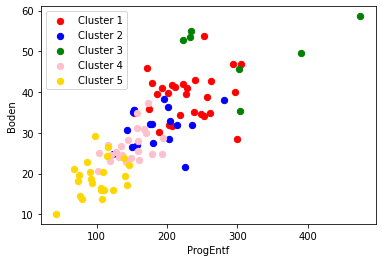

In [13]:
#We'll do this a couple of times, let's make a function
def plotClusters(xAxis, yAxis):
    plt.scatter(data_mffw[data_mffw['Cluster']==0][xAxis], data_mffw[data_mffw['Cluster']==0][yAxis], s=40, c='red', label ='Cluster 1')
    plt.scatter(data_mffw[data_mffw['Cluster']==1][xAxis], data_mffw[data_mffw['Cluster']==1][yAxis], s=40, c='blue', label ='Cluster 2')
    plt.scatter(data_mffw[data_mffw['Cluster']==2][xAxis], data_mffw[data_mffw['Cluster']==2][yAxis], s=40, c='green', label ='Cluster 3')
    plt.scatter(data_mffw[data_mffw['Cluster']==3][xAxis], data_mffw[data_mffw['Cluster']==3][yAxis], s=40, c='pink', label ='Cluster 4')
    plt.scatter(data_mffw[data_mffw['Cluster']==4][xAxis], data_mffw[data_mffw['Cluster']==4][yAxis], s=40, c='gold', label ='Cluster 5')
    plt.xlabel(xAxis)
    plt.ylabel(yAxis)    
    plt.legend() 
    
plotClusters('ProgEntf', 'Boden')

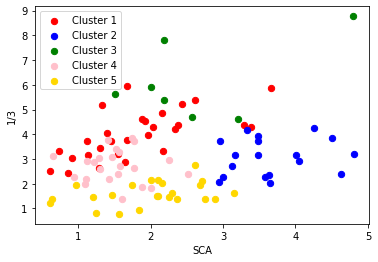

In [15]:
plotClusters('SCA', '1/3')

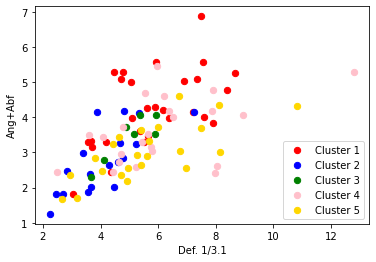

In [16]:
plotClusters('Def. 1/3.1', 'Ang+Abf')